## Introduction

We have passenger data(i.e Name, class, Age, Gender, etc) of Titanic ship.Titanic sank after colliding with an iceberg.
Unfortunately there weren't enough life boats for everyone to onboard.Some groups of passengers were more likely to surive than others.

Our Goal is to build a classification model that takes the passenger data and predicts whether they were survived or not.

## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##  Importing Data

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 7 numerical features and 5 categorical features.
    As we can see Age and Cabin features has missing data we will handle it later.

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Sex

In [7]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
train_data.groupby("Sex")["Survived"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


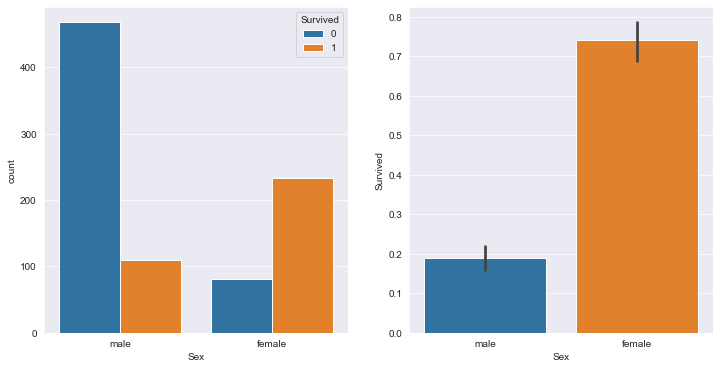

In [9]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.countplot(x="Sex", data=train_data, hue="Survived", ax=axes[0])
sns.barplot(x="Sex", y="Survived", data=train_data, ax=axes[1])

As we can see from the above graphs women has more chance of surviving than men

### Pclass

In [10]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

We can see more passengers are from third class.

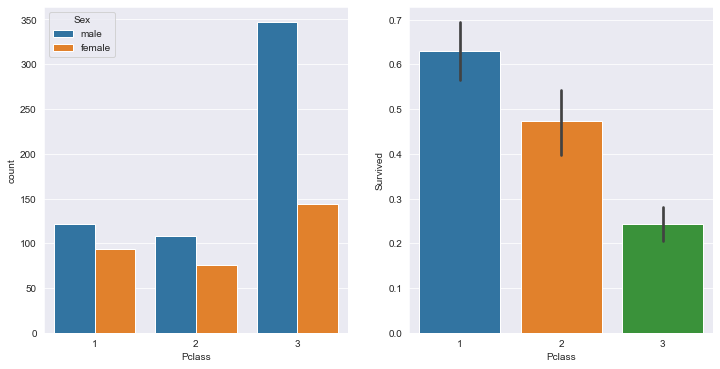

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.countplot(x="Pclass", data=train_data, hue="Sex", ax=axes[0])
sns.barplot(x="Pclass", y="Survived", data=train_data, ax=axes[1])

Graph tells us that suvival rate of first class passenger is more than the survival rate of second class and the third class

### Name

In [12]:
train_data["Name"].value_counts()

Dahlberg, Miss. Gerda Ulrika                           1
Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)    1
O'Connell, Mr. Patrick D                               1
Jardin, Mr. Jose Neto                                  1
Butt, Major. Archibald Willingham                      1
                                                      ..
McMahon, Mr. Martin                                    1
Molson, Mr. Harry Markland                             1
Canavan, Miss. Mary                                    1
O'Brien, Mr. Timothy                                   1
Pickard, Mr. Berk (Berk Trembisky)                     1
Name: Name, Length: 891, dtype: int64

By observing the data Mr., Mrs., Miss., Master, Don, Rev, Mlle, Dr., Capt are the common titles present in Names of the passengers. 

In [13]:
train_data["Name"] = train_data["Name"].apply(lambda x : x.split(',')[1].split('.')[0].strip())

In [14]:
train_data["Name"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Ms                1
Jonkheer          1
Lady              1
Mme               1
Sir               1
Capt              1
Don               1
the Countess      1
Name: Name, dtype: int64

It would be better to move the low frequency titles to bigger groups

In [15]:
train_data["Name"] = train_data["Name"].replace(["Mlle", "Lady", "Mme", "Ms", "the Countess"], "Miss")
train_data["Name"] = train_data["Name"].replace(["Major", "Col", "Capt", "Jonkheer", "Don", "Sir"], "Mr")

In [16]:
train_data["Name"].value_counts()

Mr        525
Miss      188
Mrs       125
Master     40
Dr          7
Rev         6
Name: Name, dtype: int64

Let's do the same for the Test data.

In [17]:
test_data["Name"] = test_data["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [18]:
test_data["Name"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Name, dtype: int64

In [19]:
test_data["Name"] = test_data["Name"].replace(["Dona", "Ms"], "Miss")
test_data["Name"] = test_data["Name"].replace(["Col"], "Mr")

In [20]:
test_data["Name"].value_counts()

Mr        242
Miss       80
Mrs        72
Master     21
Rev         2
Dr          1
Name: Name, dtype: int64

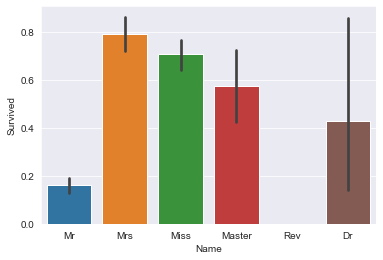

In [21]:
sns.barplot(x="Name", y="Survived", data=train_data)

### Age

In [22]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

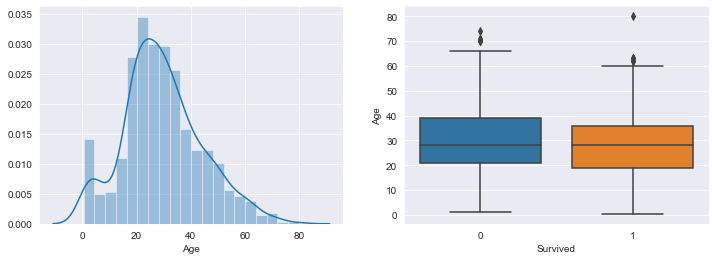

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.distplot(train_data['Age'], ax=axes[0])
sns.boxplot(x="Survived", y="Age", data=train_data, ax=axes[1])

### Fare

In [24]:
train_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Fare feature is positively skewed with 75% of data lies in between 0 and 32 

Minimum amount of fare is 0 which is a bit odd as everyone has to pay some amount to get onto the ship

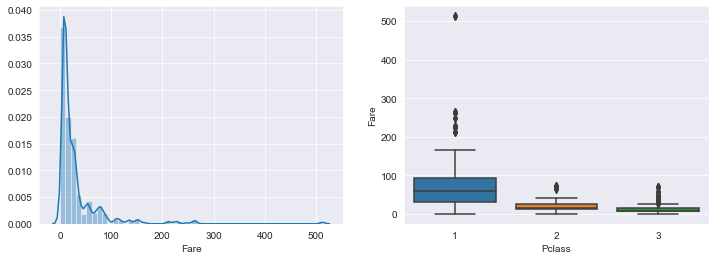

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
                                                        
sns.distplot(train_data["Fare"], ax=axes[0])
sns.boxplot(x="Pclass", y="Fare", data=train_data, ax=axes[1])

In [26]:
print(train_data[train_data["Pclass"] == 1]["Fare"].describe(), '\n')
print(train_data[train_data["Pclass"] == 2]["Fare"].describe(), '\n')
print(train_data[train_data["Pclass"] == 3]["Fare"].describe(), '\n')

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64 

count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64 

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64 



In [27]:
train_data[train_data["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,Mr,male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,Mr,male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,Mr,male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,Mr,male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,Mr,male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,Mr,male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,Mr,male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,Mr,male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,Mr,male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,Mr,male,NaN,0,0,112052,0.0,NaN,S


In [28]:
def replace_fare(cols):
    pclass = cols[0]
    fare = cols[1]
    if not fare == 0:
        return fare
    if pclass == 1:
        return 60.287
    elif pclass == 2:
        return 14.25
    elif pclass == 3:
        return 8.05

In [29]:
train_data["Fare"] = train_data[["Pclass", "Fare"]].apply(replace_fare, axis=1)

In [30]:
test_data["Fare"].fillna(0, inplace=True)

In [31]:
test_data[test_data["Fare"] == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,Mr,male,60.5,0,0,3701,0.0,NaN,S
266,1158,1,Mr,male,NaN,0,0,112051,0.0,NaN,S
372,1264,1,Mr,male,49.0,0,0,112058,0.0,B52 B54 B56,S


In [32]:
test_data["Fare"] = test_data[["Pclass", "Fare"]].apply(replace_fare, axis=1)

### Family size

In [33]:
def fam_cat(cols):
    sibsp = cols[0]
    parch = cols[1]
    if sibsp + parch == 0:
        return 'Solo'
    elif sibsp + parch <= 3:
        return 'Nuclear'
    else:
        return 'Big'

In [34]:
train_data["Family"] = train_data[["SibSp", "Parch"]].apply(fam_cat, axis=1)

In [35]:
train_data.drop(["SibSp", "Parch"], axis=1, inplace=True)

In [36]:
test_data["Family"] = test_data[["SibSp", "Parch"]].apply(fam_cat, axis=1)

In [37]:
test_data.drop(["SibSp", "Parch"], axis=1, inplace=True)

### Handling missing data

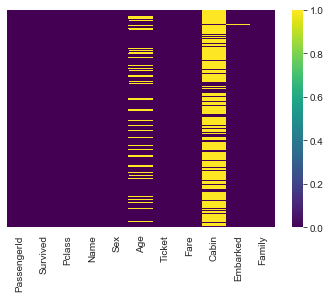

In [38]:
sns.heatmap(train_data.isnull(), yticklabels=False, cmap='viridis')

As we can see there are lot of missing values in the Age and cabin feature

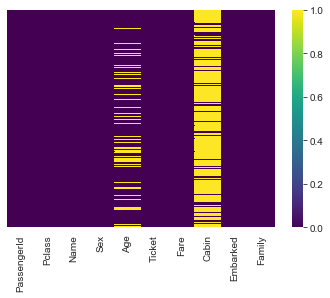

In [39]:
sns.heatmap(test_data.isnull(), cmap="viridis", yticklabels=False)

### Cabin

In [40]:
d = train_data.copy()
d["Cabin"].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
F33            3
              ..
C101           1
B38            1
E12            1
E38            1
D7             1
Name: Cabin, Length: 147, dtype: int64

In [41]:
d_test = test_data.copy()
d_test["Cabin"].value_counts()

B57 B59 B63 B66    3
C89                2
C23 C25 C27        2
C78                2
B45                2
                  ..
A11                1
C106               1
D34                1
D38                1
F33                1
Name: Cabin, Length: 76, dtype: int64

In [42]:
def cabin(val):
    if val == 0:
        return 0
    else:
        return 1

In [43]:
d["Cabin"] = d["Cabin"].fillna(0)
d["Cabin"] = d["Cabin"].apply(cabin)
d["Cabin"].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

In [44]:
d_test["Cabin"] = d_test["Cabin"].fillna(0)
d_test["Cabin"] = d_test["Cabin"].apply(cabin)
d_test["Cabin"].value_counts()

0    327
1     91
Name: Cabin, dtype: int64

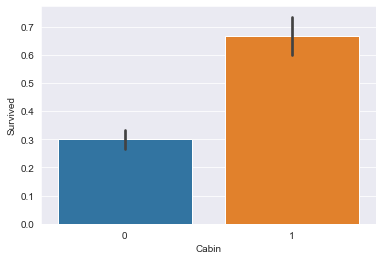

In [45]:
sns.barplot(x="Cabin", y="Survived", data=d)

In [46]:
train_data["Cabin"] = d["Cabin"]

In [47]:
test_data["Cabin"] = d_test["Cabin"]

Now, we have to handle Age column carefully.Let's analyse the Age column with respect to Pclass 

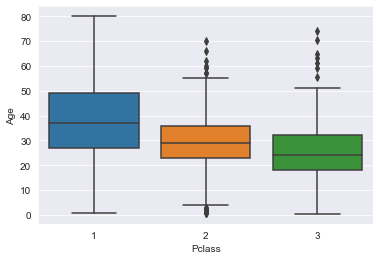

In [48]:
sns.boxplot(x="Pclass", y="Age", data=train_data)

Replace the age of the passengers with thier respective class age medians

In [49]:
def fill_age(cols):
    age, pclass = cols
    if not pd.isnull(age):
        return age
    if pclass == 1:
        return 37
    elif pclass == 2:
        return 29
    else:
        return 24
    

In [50]:
train_data["Age"] = train_data[["Age", "Pclass"]].apply(fill_age, axis=1)

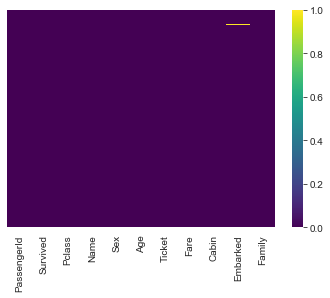

In [51]:
sns.heatmap(train_data.isnull(), yticklabels=False, cmap="viridis")

In [52]:
test_data["Age"] = test_data[["Age", "Pclass"]].apply(fill_age, axis=1)

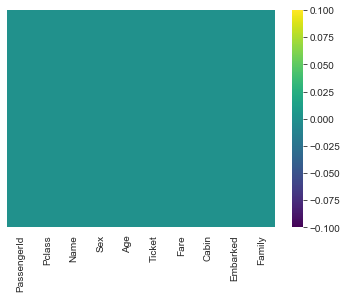

In [53]:
sns.heatmap(test_data.isnull(), yticklabels=False, cmap="viridis")

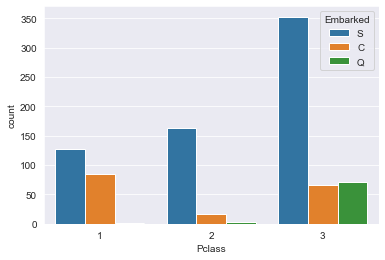

In [54]:
sns.countplot("Pclass", data=train_data, hue="Embarked")

In [55]:
train_data.drop(["Ticket", "PassengerId"], axis=1, inplace=True)

In [56]:
test_data.drop(["Ticket", "PassengerId"], axis=1, inplace=True)

## Modeling

Now, It's time to build the model 

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  889 non-null    object 
 8   Family    891 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [58]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,Mr,male,22.0,7.2500,0,S,Nuclear
1,1,1,Mrs,female,38.0,71.2833,1,C,Nuclear
2,1,3,Miss,female,26.0,7.9250,0,S,Solo
3,1,1,Mrs,female,35.0,53.1000,1,S,Nuclear
4,0,3,Mr,male,35.0,8.0500,0,S,Solo


In [59]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   Fare      418 non-null    float64
 5   Cabin     418 non-null    int64  
 6   Embarked  418 non-null    object 
 7   Family    418 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 26.2+ KB


In [60]:
test_data.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,3,Mr,male,34.5,7.8292,0,Q,Solo
1,3,Mrs,female,47.0,7.0000,0,S,Nuclear
2,2,Mr,male,62.0,9.6875,0,Q,Solo
3,3,Mr,male,27.0,8.6625,0,S,Solo
4,3,Mrs,female,22.0,12.2875,0,S,Nuclear


In [61]:
X_train = train_data.iloc[:, 1:].values
Y_train = train_data.iloc[:, 0].values

In [62]:
X_train

array([[3, 'Mr', 'male', ..., 0, 'S', 'Nuclear'],
       [1, 'Mrs', 'female', ..., 1, 'C', 'Nuclear'],
       [3, 'Miss', 'female', ..., 0, 'S', 'Solo'],
       ...,
       [3, 'Miss', 'female', ..., 0, 'S', 'Nuclear'],
       [1, 'Mr', 'male', ..., 1, 'C', 'Solo'],
       [3, 'Mr', 'male', ..., 0, 'Q', 'Solo']], dtype=object)

In [63]:
Y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [64]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp.fit(X_train)
X_train = imp.transform(X_train)

In [65]:
X_train.shape

(891, 8)

One hot encode the categorical columns using OneHotEncoder and columntransformer

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1, 2, 6, 7])], remainder="passthrough")
X_train = ct.fit_transform(X_train)

In [67]:
X_train

array([[0.0, 0.0, 0.0, ..., 22.0, 7.25, 0],
       [0.0, 0.0, 0.0, ..., 38.0, 71.2833, 1],
       [0.0, 0.0, 1.0, ..., 26.0, 7.925, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 24.0, 23.45, 0],
       [0.0, 0.0, 0.0, ..., 26.0, 30.0, 1],
       [0.0, 0.0, 0.0, ..., 32.0, 7.75, 0]], dtype=object)

Extract the best features using Recursive feature elemination

In [69]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
rfecv = RFECV(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1, criterion='entropy'), cv=10, n_jobs=-1)
rfecv.fit(X_train, Y_train)

RFECV(cv=10,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='entropy',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1000, n_jobs=-1,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=-1, scoring=None, step=1, verbose=0)

In [70]:
X_train = rfecv.transform(X_train)
X_train.shape

(891, 8)

In [71]:
rfecv.ranking_

array([11,  8,  5,  1,  4, 10,  1,  1,  7,  9,  3,  1,  2,  6,  1,  1,  1,
        1])

Find the model that gives the best results and doesn't overfit the training data

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
gnb = GaussianNB()
dst = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()

In [73]:
parameters = {"lr" : [{'C' : [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0], "max_iter" : [1000]}], 
              "knn": [{'n_neighbors' : list(range(1, 41))}],
              "svm": [{'C' : [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0], 'kernel' : ["linear"]}, 
                      {'C' : [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0], 'kernel' : ["rbf"], 'gamma' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}],
              "gnb": [{}],
              "dst": [{"criterion" : ["entropy"]}],
              "rfc": [{"n_estimators" : [50, 100, 250, 500, 1000], "criterion" : ["entropy"], "n_jobs":[-1]}],
              "xgb": [{"max_depth" : [3, 5, 10], "n_estimators": [50, 100, 250, 500, 1000], "gamma": [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]}

In [74]:
models = [("lr", lr), ("knn", knn), ("svm", svm), ("gnb", gnb), ("dst", dst), ("rfc", rfc), ("xgb", xgb)]

In [75]:
from sklearn.model_selection import GridSearchCV
def selection(models, parameters):
    for name, model in models:
        grid_search = GridSearchCV(estimator=model, param_grid=parameters[name], n_jobs=-1, cv=10, scoring="accuracy")
        grid_search.fit(X_train, Y_train)
        best_accuracy = grid_search.best_score_
        best_parameters = grid_search.best_params_
        print("Accuracy with model {0} is {1:0.2f}".format(name, best_accuracy * 100))
        print("Best Parameters for model ", name, " is ", best_parameters)

In [76]:
selection(models, parameters)

Accuracy with model lr is 82.27
Best Parameters for model  lr  is  {'C': 3.0, 'max_iter': 1000}
Accuracy with model knn is 73.40
Best Parameters for model  knn  is  {'n_neighbors': 3}
Accuracy with model svm is 81.93
Best Parameters for model  svm  is  {'C': 0.1, 'kernel': 'linear'}
Accuracy with model gnb is 80.02
Best Parameters for model  gnb  is  {}
Accuracy with model dst is 80.36
Best Parameters for model  dst  is  {'criterion': 'entropy'}
Accuracy with model rfc is 83.17
Best Parameters for model  rfc  is  {'criterion': 'entropy', 'n_estimators': 1000, 'n_jobs': -1}
Accuracy with model xgb is 84.85
Best Parameters for model  xgb  is  {'gamma': 0.4, 'max_depth': 5, 'n_estimators': 100}


In [77]:
xgb = XGBClassifier(max_depth=5, gamma=0.2, n_estimators=100)
xgb.fit(X_train, Y_train)
y_xgb = xgb.predict(X_train)

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_xgb)


array([[522,  27],
       [ 58, 284]], dtype=int64)

In [79]:
rfc = RandomForestClassifier(criterion="entropy", n_estimators=1000, n_jobs=-1)

In [80]:
rfc.fit(X_train, Y_train)
y_rfc = rfc.predict(X_train)

In [81]:
confusion_matrix(Y_train, y_rfc)

array([[545,   4],
       [ 10, 332]], dtype=int64)

In [82]:
lr = LogisticRegression(C=1.0, max_iter=1000)
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
X_test = test_data.iloc[:, :]
print(X_test.shape)
X_test = imp.transform(X_test)

(418, 8)


In [84]:
X_test = ct.transform(X_test)

In [85]:
X_test = rfecv.transform(X_test)

In [86]:
Y_test_xgb = xgb.predict(X_test)
Y_test_rfc = rfc.predict(X_test)
Y_test_lr = lr.predict(X_test)

In [87]:
Y_test = Y_test_rfc

In [88]:
sample = pd.read_csv("gender_submission.csv")

In [89]:
submission = pd.concat([sample["PassengerId"].apply(int), pd.DataFrame(data=Y_test, columns=["Survived"])], axis=1)

In [90]:
submission.to_csv("submission.csv", index=False)